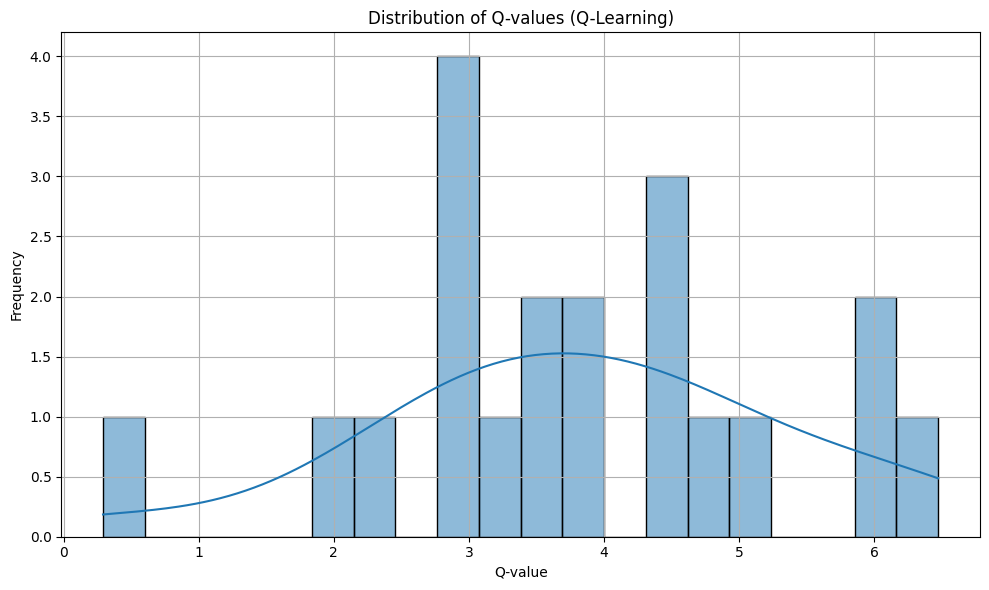

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
import seaborn as sns

# Ensure the correct file path
file_path = Path("../CosmosDB/scheduled_tests_qlearning.csv")
if not file_path.exists():
    raise FileNotFoundError(f"File not found: {file_path.resolve()}")
# Load the CSV
df_qlearning = pd.read_csv(file_path)


# Plot the distribution of Q-values
plt.figure(figsize=(10, 6))
sns.histplot(df_qlearning["Q_value"], kde=True, bins=20)
plt.title("Distribution of Q-values (Q-Learning)")
plt.xlabel("Q-value")
plt.ylabel("Frequency")
plt.grid(True)
plt.tight_layout()
plt.show()

In [9]:
# Display top 10 test cases with highest Q-values
df_qlearning.sort_values(by="Q_value", ascending=False)

,testCaseId,nRuns,nFail,nPass,avgTime,lastRun,failRate,recency,normTime,normRecency,state_fail,state_recency,state_time,state_index,runDecision,Q_value,testCaseTitle
0,6,105,105,0,4.041838,2025-05-29 12:03:17.840860,1.000000,101.643202,0.758103,4.731731e-04,3,1,3,3,1,6.474803,Test04 {Autobot1}
2,17,102,17,85,5.009961,2025-05-26 11:28:57.173054,0.166667,174.215610,1.000000,9.997643e-01,2,2,3,10,1,6.000317,"Test15 {Autobot2,Autobot3}"
1,22,102,34,68,4.009775,2025-05-26 11:27:56.003553,0.333333,174.232601,0.750092,9.999983e-01,2,2,3,10,1,6.000317,"Test20 {Autobot1,Autobot2,Autobot3}"
3,15,101,0,101,5.009139,2025-05-26 11:32:00.268272,0.000000,174.164750,0.999795,9.990640e-01,0,1,3,9,1,4.963950,Test13 {Autobot3}
4,5,102,19,83,3.016539,2025-05-26 11:27:55.561495,0.186275,174.232724,0.501921,1.000000e+00,2,3,2,2,1,4.902787,"Test03 {Autobot1,Autobot2}"
5,14,102,1,101,4.009010,2025-05-26 11:27:55.809101,0.009804,174.232656,0.749901,9.999991e-01,1,3,2,8,1,4.543914,"Test12 {Autobot1,Autobot2}"
6,16,102,11,91,3.009324,2025-05-26 11:27:55.856517,0.107843,174.232642,0.500118,9.999989e-01,1,3,2,8,1,4.543914,"Test14 {Autobot1,Autobot3}"
7,10,102,0,102,4.009275,2025-05-26 11:27:55.711864,0.000000,174.232683,0.749967,9.999994e-01,0,3,3,7,1,4.470366,"Test08 {Autobot1,Autobot2,Autobot3}"
8,20,101,0,101,3.008426,2025-05-26 11:32:00.316208,0.000000,174.164737,0.499894,9.990638e-01,0,1,1,13,1,3.970717,Test18 {Autobot3}
9,19,102,8,94,2.008284,2025-05-26 11:28:57.220952,0.078431,174.215597,0.249997,9.997642e-01,1,2,0,12,1,3.865874,Test17 {Autobot2}


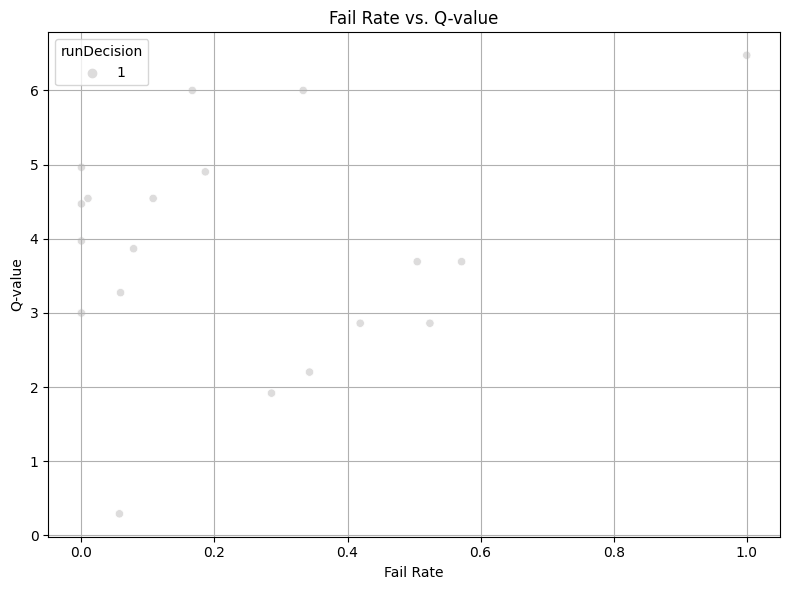

In [10]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_qlearning, x="failRate", y="Q_value", hue="runDecision", palette="coolwarm")
plt.title("Fail Rate vs. Q-value")
plt.xlabel("Fail Rate")
plt.ylabel("Q-value")
plt.grid(True)
plt.tight_layout()
plt.show()


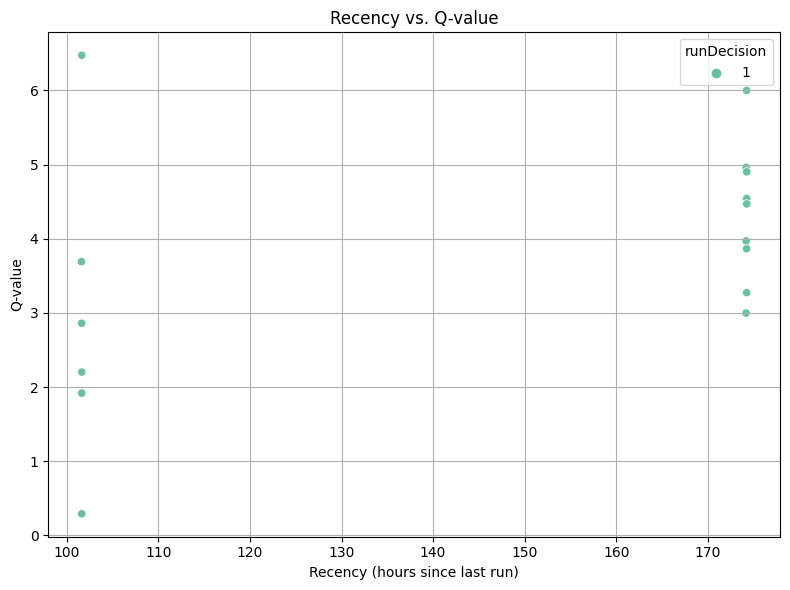

In [11]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_qlearning, x="recency", y="Q_value", hue="runDecision", palette="Set2")
plt.title("Recency vs. Q-value")
plt.xlabel("Recency (hours since last run)")
plt.ylabel("Q-value")
plt.grid(True)
plt.tight_layout()
plt.show()


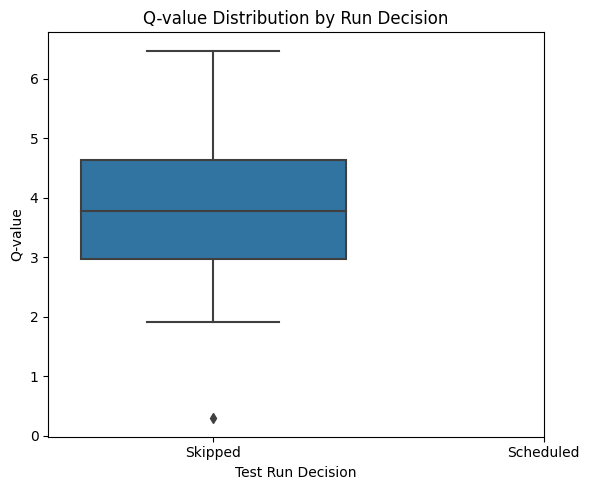

In [12]:
plt.figure(figsize=(6, 5))
sns.boxplot(data=df_qlearning, x="runDecision", y="Q_value")
plt.xticks([0, 1], ["Skipped", "Scheduled"])
plt.title("Q-value Distribution by Run Decision")
plt.xlabel("Test Run Decision")
plt.ylabel("Q-value")
plt.tight_layout()
plt.show()


In [13]:
summary = df_qlearning.groupby("runDecision")[["failRate", "recency", "avgTime"]].mean().rename(index={0: "Skipped", 1: "Scheduled"})
print("\n📊 Average metrics:\n")
print(summary)



📊 Average metrics:

             failRate     recency   avgTime
runDecision                                
Scheduled    0.232297  145.176439  2.763009
